In [224]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot  as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [225]:
# CHARGEMENT DU DATASET 
df = pd.read_csv("titanic.csv")
l = LabelEncoder()

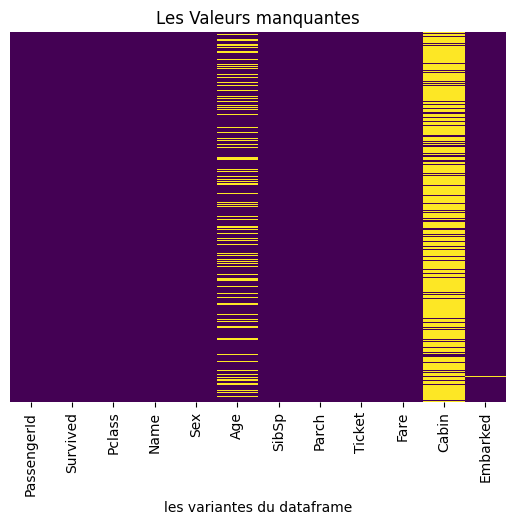

In [226]:
sb.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Les Valeurs manquantes')
plt.xlabel("les variantes du dataframe")
plt.show()

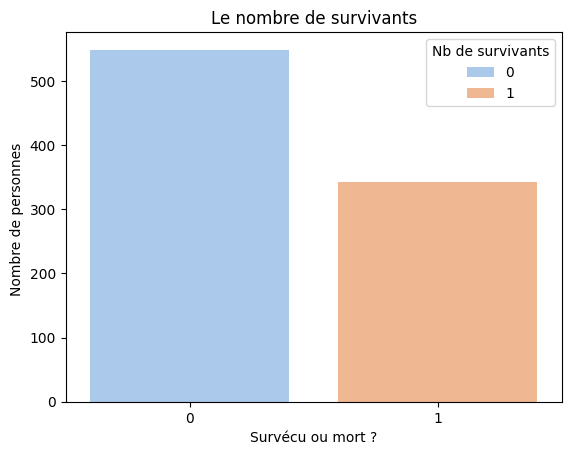

In [227]:
sb.countplot(x='Survived',hue='Survived',data=df,palette='pastel')
plt.title("Le nombre de survivants")
plt.xlabel("Survécu ou mort ?")
plt.ylabel("Nombre de personnes ")
plt.legend(title="Nb de survivants")
plt.show()

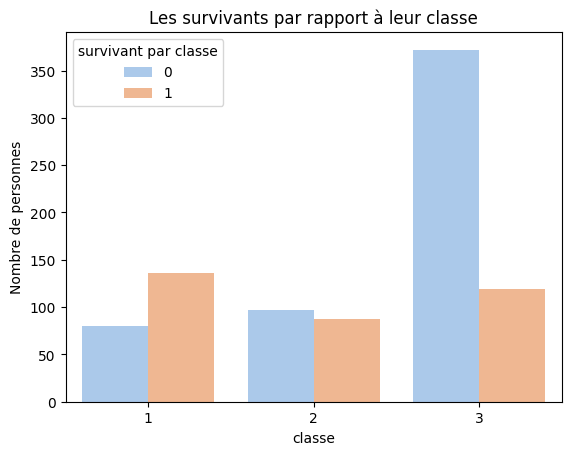

In [121]:
sb.countplot(x='Pclass',hue='Survived',data=df,palette='pastel')
plt.title("Les survivants par rapport à leur classe")
plt.xlabel("classe")
plt.ylabel("Nombre de personnes")
plt.legend(title="survivant par classe")
plt.show()

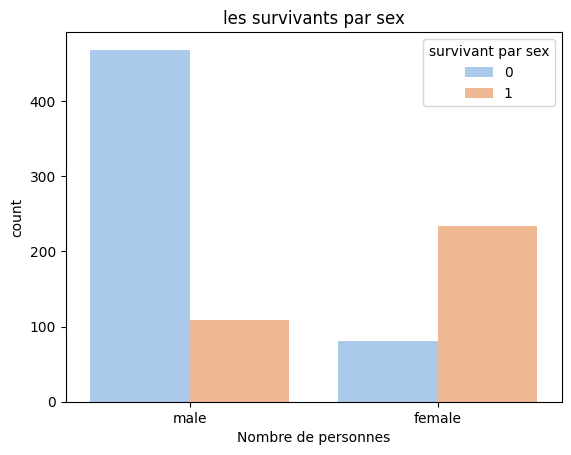

In [145]:
sb.countplot(x='Sex',hue='Survived',data=df,palette='pastel')
plt.title('les survivants par sex')
plt.xlabel('Homme ou femme ?')
plt.xlabel('Nombre de personnes')
plt.legend(title='survivant par sex')
plt.show()

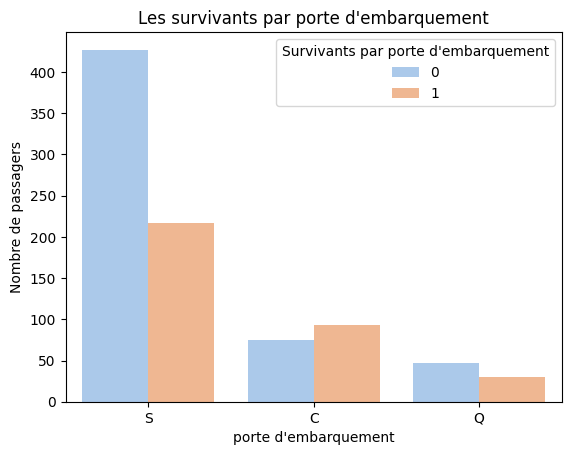

In [114]:
sb.countplot(x='Embarked',hue='Survived',data=df,palette='pastel')
plt.title('Les survivants par porte d\'embarquement')
plt.xlabel('porte d\'embarquement')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survivants par porte d\'embarquement')
plt.show()

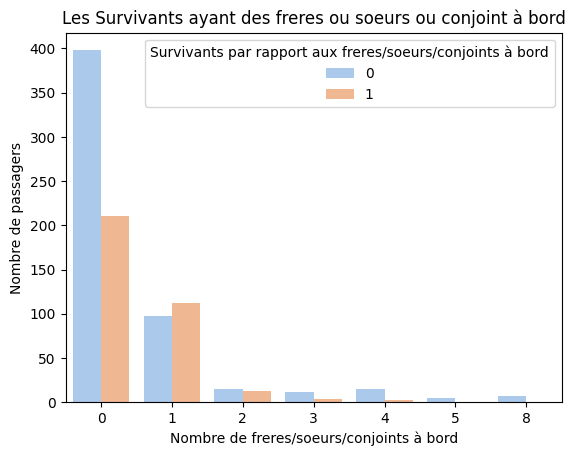

In [146]:
sb.countplot(x='SibSp',hue='Survived',data=df,palette='pastel')
plt.title("Les Survivants ayant des freres ou soeurs ou conjoint à bord")
plt.xlabel("Nombre de freres/soeurs/conjoints à bord")
plt.ylabel("Nombre de passagers")
plt.legend(title='Survivants par rapport aux freres/soeurs/conjoints à bord')
plt.show()

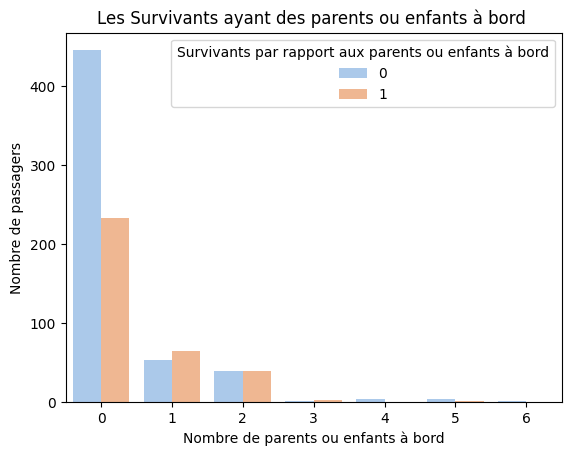

In [148]:
sb.countplot(x='Parch',hue='Survived',data=df,palette='pastel')
plt.title("Les Survivants ayant des parents ou enfants à bord ")
plt.xlabel("Nombre de parents ou enfants à bord")
plt.ylabel("Nombre de passagers")
plt.legend(title='Survivants par rapport aux parents ou enfants à bord')
plt.show()

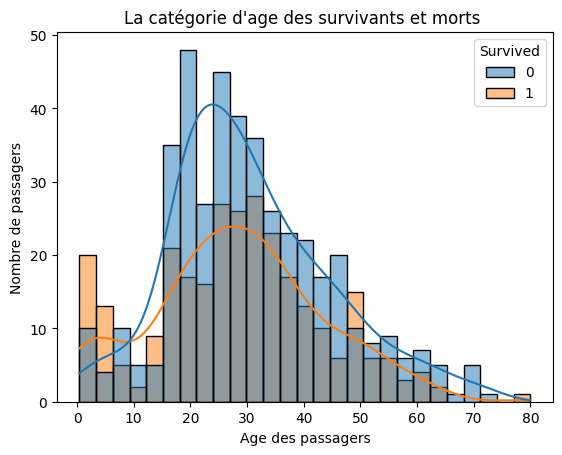

In [149]:
sb.histplot(x=df['Age'].dropna(),hue='Survived',data=df,binwidth=3, kde='True')
plt.title("La catégorie d\'age des survivants et morts ")
plt.xlabel("Age des passagers")
plt.ylabel("Nombre de passagers")
plt.show()

In [228]:
# preparation de variable pour le modele 
median_age = df['Age'].median()
# cette colonne contient plusieurs (NaN values)
df.drop('Cabin',axis=1, inplace=True)
# cette colonne ne fournit pas une information necessaire à l'analyse des données 
df.drop('Name',axis=1, inplace=True)
# cette colonne ne fournit pas une information necessaire à l'analyse des données 
df.drop('Ticket',axis=1, inplace=True)
df['Age'].fillna(median_age,inplace=True)
df['Sex'] = l.fit_transform(df['Sex'])
new_df = pd.get_dummies(df,columns=['Embarked'])
new_df_2= pd.get_dummies(new_df,columns=['Pclass'])
new_df_2['Embarked_C'] = l.fit_transform(new_df_2['Embarked_C'])
new_df_2['Embarked_Q'] = l.fit_transform(new_df_2['Embarked_Q'])
new_df_2['Embarked_S'] = l.fit_transform(new_df_2['Embarked_S'])
new_df_2['Pclass_1'] = l.fit_transform(new_df_2['Pclass_1'])
new_df_2['Pclass_2'] = l.fit_transform(new_df_2['Pclass_2'])
new_df_2['Pclass_3'] = l.fit_transform(new_df_2['Pclass_3'])
data_cleaned = new_df_2.dropna(axis=1)

In [229]:
data_cleaned.info()
print(data_cleaned.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    int64  
 8   Embarked_Q   891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
 10  Pclass_1     891 non-null    int64  
 11  Pclass_2     891 non-null    int64  
 12  Pclass_3     891 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 87.1 KB
(891, 13)


In [230]:
#découpage de data set 
X = data_cleaned.drop(columns='Survived',axis=1)
y = data_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
########################### REGRESSION LOGISTIQUE ####################################
# Le modele 
model = LogisticRegression(max_iter=1000)
# l'entrainement
model.fit(X_train,y_train)
# la prediction
y_pred = model.predict(X_test)
# l'evaluation
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
my_metrics = {'accuracy' :accuracy , 'precison' : precision , 'recall' : recall , 'f1' : f1}
my_metrics

{'accuracy': 0.8044692737430168,
 'precison': 0.782608695652174,
 'recall': 0.7297297297297297,
 'f1': 0.7552447552447553}

In [220]:
########################### KNN ####################################
# le modele 
knn_classifier = KNeighborsClassifier(n_neighbors=3)
# l'entrainement 
knn_classifier.fit(X_train, y_train)
# la prediction 
y_pred = knn_classifier.predict(X_test)
# L'evaluation
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
my_metrics = {'accuracy' :accuracy , 'precison' : precision , 'recall' : recall , 'f1' : f1}
my_metrics

{'accuracy': 0.5865921787709497,
 'precison': 0.5,
 'recall': 0.33783783783783783,
 'f1': 0.4032258064516129}

In [232]:
########################### SVM ####################################
# le modele
svm_classifier = SVC(kernel='linear', C=1.0)
# l'entrainement
svm_classifier.fit(X_train, y_train)
# la prediction
y_pred = svm_classifier.predict(X_test)
#l'evaluation
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
my_metrics = {'accuracy' :accuracy , 'precison' : precision , 'recall' : recall , 'f1' : f1}
my_metrics

{'accuracy': 0.7877094972067039,
 'precison': 0.7727272727272727,
 'recall': 0.6891891891891891,
 'f1': 0.7285714285714284}

In [233]:
########################### ARBRE DE DECISION ####################################
# le modele 
tree_classifier = DecisionTreeClassifier(random_state=42)
# l'entrainement
tree_classifier.fit(X_train, y_train)
# la prediction 
y_pred = tree_classifier.predict(X_test)
#l'evaluation
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
my_metrics = {'accuracy' :accuracy , 'precison' : precision , 'recall' : recall , 'f1' : f1}
my_metrics

{'accuracy': 0.7430167597765364,
 'precison': 0.7,
 'recall': 0.6621621621621622,
 'f1': 0.6805555555555556}